<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/Car_price_prediction_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA)

https://medium.com/@nitin.data1997/from-vintage-cars-to-data-gold-a-dive-into-car-price-prediction-9241f9c428a4

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab images/auto.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


First Row Surprise:

Unlike most datasets, the first row here isn’t a header; it’s just more data.

In [2]:
col_names= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = col_names
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
df1 = df.replace('?',np.NaN)
print(df1.shape)
df1.head(5)

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [4]:
#to predict price, cannot work with missing price
#drop the rows with missing price info
df2 = df1.dropna(subset=['price'],axis = 0)
print(df2.shape)
df2.describe()

(201, 26)


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
#find, count missing data
a = df2.isnull().sum()
a[a>0]

normalized-losses    37
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

**Drop the whole row**:

“price”: 4 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

**Replace by mean**

“normalized-losses”: 41 missing data, replace them with mean
“stroke”: 4 missing data, replace them with mean
“bore”: 4 missing data, replace them with mean
“horsepower”: 2 missing data, replace them with mean
“peak-rpm”: 2 missing data, replace them with mean

**Replace by frequency:**

“num-of-doors”: 2 missing data, replace them with “four”.
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur



In [6]:
print(df2['normalized-losses'].dtypes)
df2['normalized-losses'] = df2['normalized-losses'].astype('float64')
print(df2['normalized-losses'].dtypes)
df2['normalized-losses'].mean()

object
float64


<ipython-input-6-43c3f20a62cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['normalized-losses'] = df2['normalized-losses'].astype('float64')


122.0

In [7]:
df3 = df2
df3['normalized-losses'].replace(np.NaN,df2['normalized-losses'].mean(),inplace = True)
df3['normalized-losses'].isnull().sum()

<ipython-input-7-0072212406fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['normalized-losses'].replace(np.NaN,df2['normalized-losses'].mean(),inplace = True)


0

Replace the null values in BORE and HORSEPOWER & PEAK-RPM columns in the same manner.
Replace the null values in No-Of-Doors using highest frequency, 'four'.

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use:

.dtype() to check the data type

.astype() to change the data type

standardization (miles per gallon to L/100km, etc.), scaling (0,1), normalization (average around 0, and [-1,1])

**Indicator Variable**

What is an indicator variable?

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called ‘dummies’ because the numbers themselves don’t have inherent meaning.

Why we use indicator variables?

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

inplace = True
https://towardsdatascience.com/why-you-should-probably-never-use-pandas-inplace-true-9f9f211849e4


In [8]:
df3['bore'] = df3['bore'].astype('float64')
df3['bore'].replace(np.NaN,df3['bore'].mean(),inplace=True)
df3['horsepower'] = df3['horsepower'].astype('float64')
df3['horsepower'].replace(np.NaN,df3['horsepower'].mean(),inplace=True)
df3['peak-rpm'] = df3['peak-rpm'].astype('float64')
df3['peak-rpm'].replace(np.NaN,df3['peak-rpm'].mean(),inplace=True)

df3['num-of-doors'].replace(np.NaN,'four',inplace=True)

a = df2.isnull().sum()
a[a>0]

<ipython-input-8-6018c75d03d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bore'] = df3['bore'].astype('float64')
<ipython-input-8-6018c75d03d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bore'].replace(np.NaN,df3['bore'].mean(),inplace=True)
<ipython-input-8-6018c75d03d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

stroke    4
dtype: int64

In [9]:
#done with missing values except for stroke
#transform gallone to liter

df3['city-L/100km'] = df3['city-mpg']
df3.shape

#data normalization

<ipython-input-9-ef1e67a5225f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['city-L/100km'] = df3['city-mpg']


(201, 27)

<ipython-input-10-d04ed494388a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['horsepower'] = df3['horsepower'].astype('int32')


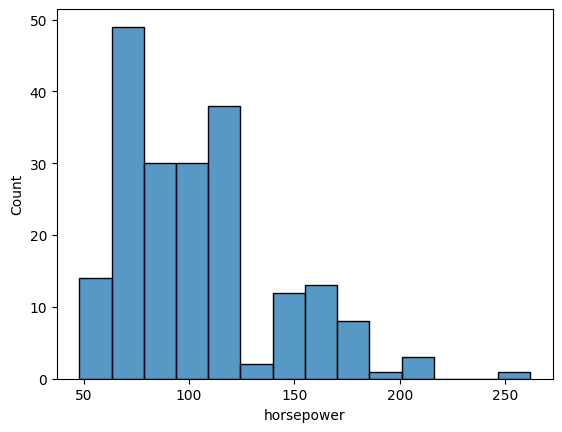

<ipython-input-10-d04ed494388a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['horsepower'] = pd.cut(df3['horsepower'],bins,labels=group_names)


<Axes: xlabel='horsepower', ylabel='Count'>

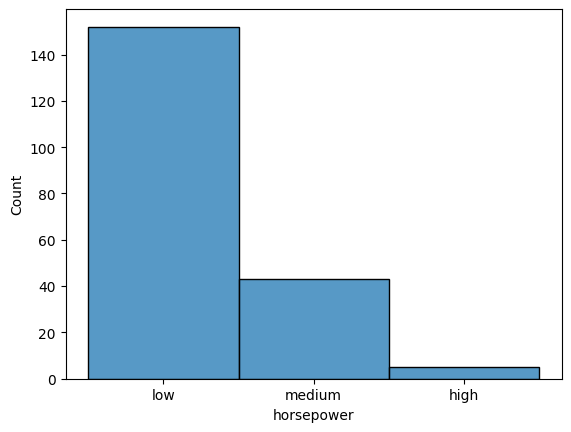

In [10]:
#binning horsepower
from matplotlib import pyplot as plt

df3['horsepower'] = df3['horsepower'].astype('int32')
import seaborn as sns
sns.histplot(df3['horsepower'])
plt.show()

bins = np.linspace(df3['horsepower'].min(),df3['horsepower'].max(),4)
group_names = ['low','medium','high']
df3['horsepower'] = pd.cut(df3['horsepower'],bins,labels=group_names)
sns.histplot(df3['horsepower'])

In [11]:
#indicator variable
df2['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [12]:
dummy = pd.get_dummies(df2['fuel-type'])
print(dummy.shape)
df3 = pd.concat([df2,dummy],axis=1)

(201, 2)


In [13]:
print(df3['gas'].value_counts())
print(df3['diesel'].value_counts())
df3.drop('fuel-type',axis=1,inplace = True)

1    181
0     20
Name: gas, dtype: int64
0    181
1     20
Name: diesel, dtype: int64


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,low,5000.0,21,27,13495,21,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,low,5000.0,21,27,16500,21,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,medium,5000.0,19,26,16500,19,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,low,5500.0,24,30,13950,24,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,low,5500.0,18,22,17450,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,low,5400.0,23,28,16845,23,0,1
201,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,medium,5300.0,19,25,19045,19,0,1
202,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,medium,5500.0,18,23,21485,18,0,1
203,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,low,4800.0,26,27,22470,26,1,0


In [16]:
#indicator varialbe -- aspiration
print(df3['aspiration'].unique())
dummy = pd.get_dummies(df3['aspiration'])
print(dummy.shape)
df4 = pd.concat([df3,dummy],axis=1)
print(df4['std'].value_counts())
print(df4['turbo'].value_counts())
df4.drop('aspiration',axis=1,inplace = True)

['std' 'turbo']
(201, 2)
1    165
0     36
Name: std, dtype: int64
0    165
1     36
Name: turbo, dtype: int64


In [17]:
df4.to_csv('clean_df4_cars.csv')

Analyzing Individual Feature Patterns Using Visualization

Choose the right visualization method

**1: Continuous Numerical Variables:**

Continuous numerical variables

scatterplots with fitted lines.

To understand the (linear) relationship

“regplot” which plots the scatterplot plus the fitted regression line

engine-size, price have positive linear
highway-mpg, price have negative lienar
peak-rpm, price have weak linear relationship

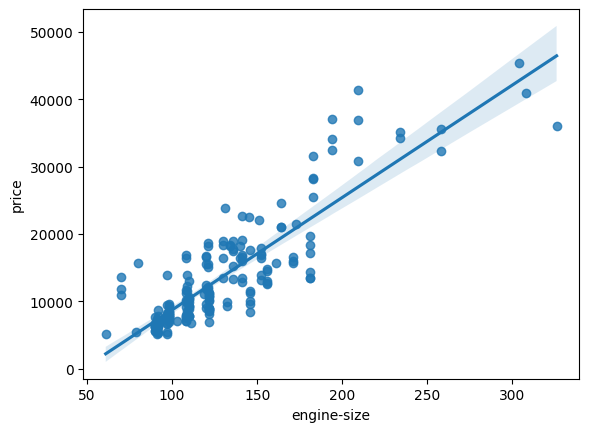

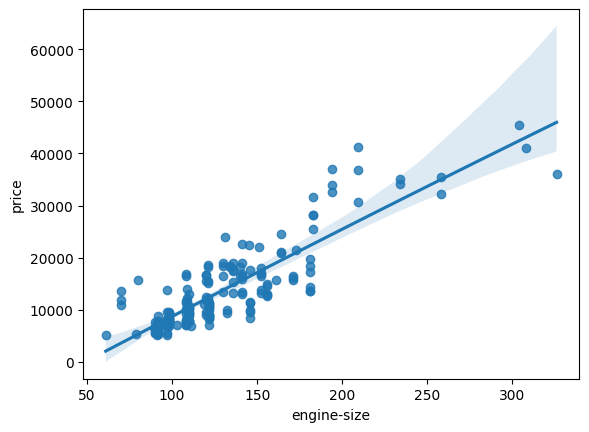

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [57]:
"""
d4['price].dtype
object
df4['price'] = df4['price'].astype('int64')
df4['price']
"""

sns.regplot(x = df4["engine-size"], y = df4["price"])
plt.show()

"""
sns.regplot(x = df4["engine-size"], y = df4["price"],order = 2)
plt.show()
"""

df4[['engine-size','price']].corr()

**2: Categorical Variables**

describe a ‘characteristic’ of a data unit,
 using boxplots

 actually, the **indicator variable** above, the dummy variable, is categorical variables as well.

<Axes: xlabel='body-style', ylabel='price'>

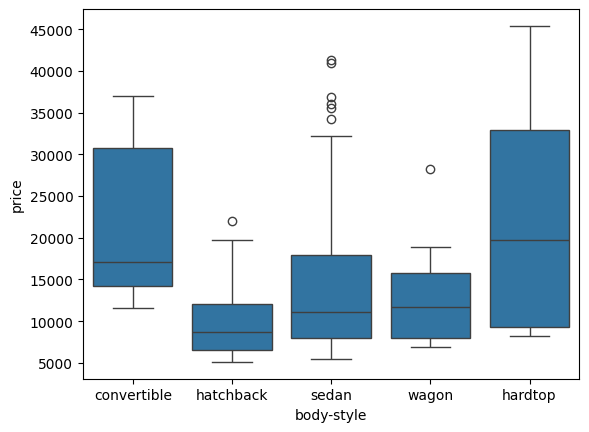

In [48]:
sns.boxplot(x = df4['body-style'], y = df4['price'])

In [50]:
# Group by
df4.groupby('body-style')['price'].mean().to_frame()

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


**Correlation and Causation**

**Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. “Correlation does not imply causation” means that just because two things happen together doesn’t mean one causes the other.

Pearson's coeff and P-value

In [56]:
from scipy import stats
p_coef,p_value = stats.pearsonr(df4['wheel-base'],df4.price)
print(f'Pearson coeff is {p_coef} with a p value of {p_value}')

Pearson coeff is 0.584641822265508 with a p value of 8.076488270732885e-20


**Conclusion: Important Variables**

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables: a total of 9

Length;
Width;
Curb-weight;
Engine-size;
Horsepower;
City-mpg;
Highway-mpg;
Wheel-base;
Bore;

Categorical variables: just one

Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model’s prediction performance.

In [58]:
df.shape
# after EDA, we only need 9 + 1 variables for machine learning

(205, 26)

the machine learning code is to be continued

so far, we only EDA explored numerical variables with strong correlation with price, also boxplot on the categorical data to pick drive-wheels